In [92]:
import pandas as pd

alldata = pd.read_csv('./dataset/AllData.csv', low_memory=False)
data_part1 = pd.read_csv('./dataset/Data_part1.csv', low_memory=False)
data_part1Stage2 = pd.read_csv('./dataset/Data_part1Stage2.csv', low_memory=False)
data_part2 = pd.read_csv('./dataset/Data_part2.csv', low_memory=False)
data_part2Stage2 = pd.read_csv('./dataset/Data_part2Stage2.csv', low_memory=False)
data_part3 = pd.read_csv('./dataset/Data_part3.csv', low_memory=False)
data_part3Stage2 = pd.read_csv('./dataset/Data_part3Stage2.csv', low_memory=False)
data_part4 = pd.read_csv('./dataset/Data_part4.csv', low_memory=False)
data_part4Stage2 = pd.read_csv('./dataset/Data_part4Stage2.csv', low_memory=False)
data_part5Stage2 = pd.read_csv('./dataset/Data_part5Stage2.csv', low_memory=False)

In [93]:
all_dataset_names = [alldata, data_part1, data_part1Stage2, data_part2, data_part2Stage2, data_part3, data_part3Stage2, data_part4, data_part4Stage2, data_part5Stage2]
complete_dataset = pd.concat(all_dataset_names, ignore_index=True, sort=False).drop(columns=['Unnamed: 0'])
complete_dataset = complete_dataset.drop(columns=list(complete_dataset.filter(regex = '^cf')))

In [94]:
#pre-process the data so that we have less product types
import matplotlib.pyplot as plt
import numpy as np

value_counts = complete_dataset['product'].value_counts()
print("We have approximately", len(value_counts), 'different products.')
print("However, we have", len(value_counts[value_counts.values <= 1000]), "products who only have 1000 or less associated requirements from our dataset.")
print("Therefore, we will take these products and just put them into the 'Other Applications' product type.")

We have approximately 101 different products.
However, we have 90 products who only have 1000 or less associated requirements from our dataset.
Therefore, we will take these products and just put them into the 'Other Applications' product type.


We now have approx. 12 different products.
The bar chart below shows the distribution of products in the dataset:


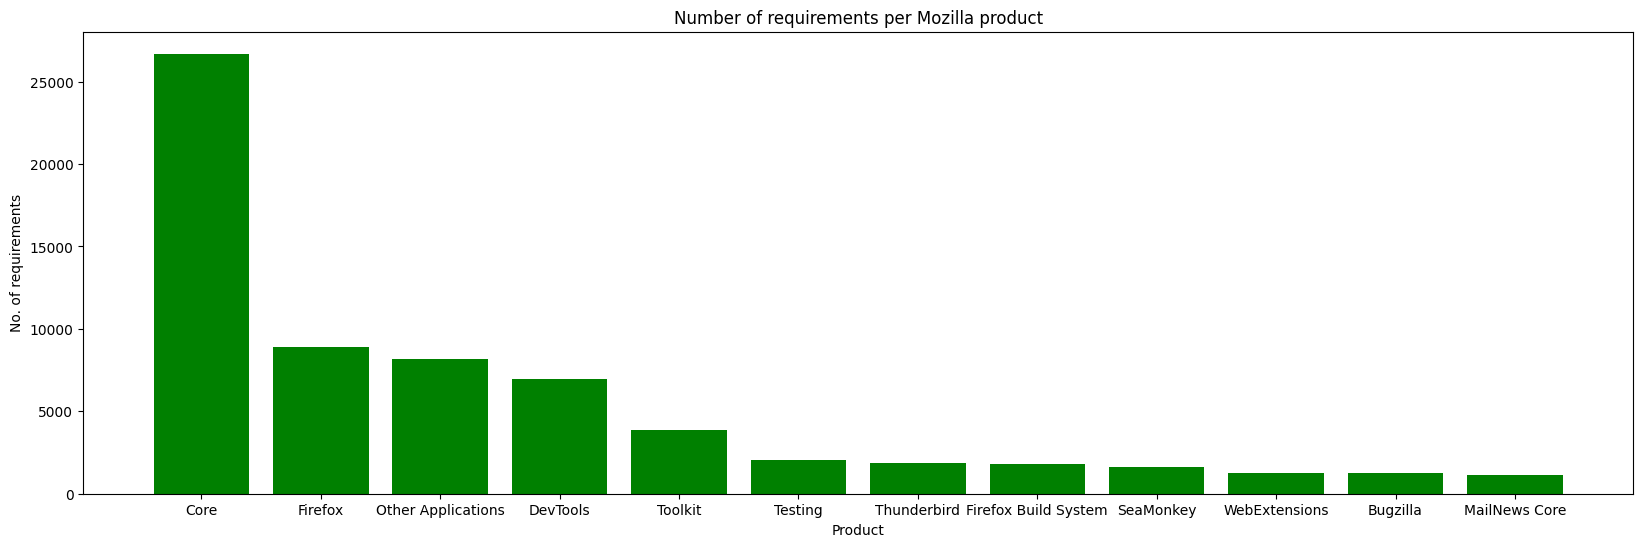

In [95]:
#pre-process the data so that we have less product types
list_of_products_with_1000_or_less_reqs = value_counts[value_counts.values <= 1000].index.tolist()
for i in range(0, len(complete_dataset)):
    if complete_dataset.iloc[i]['product'] in list_of_products_with_1000_or_less_reqs:
        complete_dataset.loc[i, 'product'] = 'Other Applications'
print("We now have approx.", len(complete_dataset['product'].value_counts()), 'different products.')

print("The bar chart below shows the distribution of products in the dataset:")
plt.figure(figsize = (20, 6))
plt.title("Number of requirements per Mozilla product")
plt.xlabel("Product")
plt.ylabel("No. of requirements")
plt.xticks(np.arange(len(complete_dataset['product'].value_counts().index.tolist())), complete_dataset['product'].value_counts().index.tolist())
plt.bar(np.arange(len(complete_dataset['product'].value_counts().values.tolist())), complete_dataset['product'].value_counts().values.tolist(), 0.8, color ='green')
plt.show()

In [135]:
#find out number of dependencies per requirement
temp = []
for i in range(0, len(complete_dataset)):
    if isinstance(complete_dataset.iloc[i]['depends_on'], str):
        temp.append(len(complete_dataset.iloc[i]['depends_on'].split(',')))
    else:
        temp.append(complete_dataset.iloc[i]['depends_on'])
all_num_of_dependencies = []
all_num_of_dependencies_values = []
temp = pd.DataFrame(temp)
for i in range(0, len(temp.value_counts())):
    all_num_of_dependencies.append(int(temp.value_counts().index[i][0]))
    all_num_of_dependencies_values.append(temp.value_counts().values[i])
print("When observing the 'depends_on' feature - interestingly - there is a requirement who has", max(all_num_of_dependencies), "dependencies.")
print("If you observe the following boxplot, then you can see that a majority of requirements have between 1-350 dependencies")
plt.figure(figsize =(6, 5))
plt.title("Number of dependencies per requirement")
plt.ylabel("No. of dependencies")
plt.boxplot(all_num_of_dependencies)
plt.show()

When observing the 'depends_on' feature - interestingly - there is a requirement who has 1455 dependencies.
If you observe the following boxplot, then you can see that a majority of requirements have between 1-350 dependencies


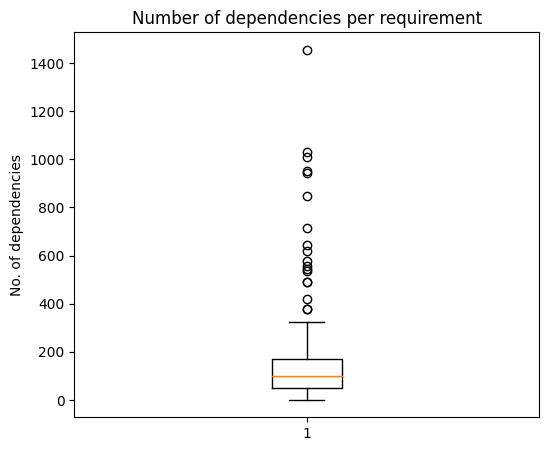

In [145]:
#find out number of dependencies per requirement
print("When observing the 'depends_on' feature - interestingly - there is a requirement who has", max(all_num_of_dependencies), "dependencies.")
print("If you observe the following boxplot, then you can see that a majority of requirements have between 1-350 dependencies")
plt.figure(figsize =(6, 5))
plt.title("Number of dependencies per requirement")
plt.ylabel("No. of dependencies")
plt.boxplot(all_num_of_dependencies)
plt.show()

Average percentage of words per summary that are stop words: 22.78%


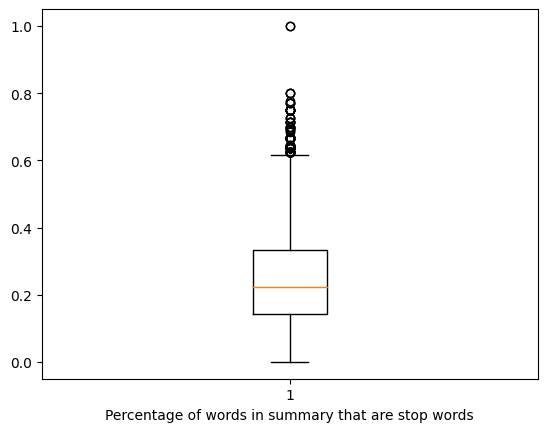

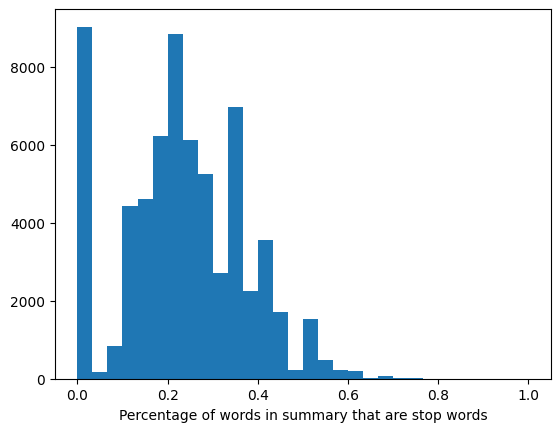

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

# --- -- - get the proportion of english stop words per summary - -- ---
summaries = complete_dataset['summary'].to_list()
stop_word_proportions = []

for summary in summaries:
    vectorizer = CountVectorizer()
    vectorizer.fit_transform([summary])
    summary_tokens = vectorizer.get_feature_names_out()
    num_stop_words = sum((token in ENGLISH_STOP_WORDS) for token in summary_tokens)
    stop_word_proportions.append(num_stop_words / len(summary_tokens))

print("Average percentage of words per summary that are stop words: {:.2f}%".format((sum(stop_word_proportions) / len(summaries)) * 100))
plt.boxplot(stop_word_proportions)
plt.xlabel('Percentage of words in summary that are stop words')
plt.show()
plt.hist(stop_word_proportions, bins=30)
plt.xlabel('Percentage of words in summary that are stop words')
plt.show()

Mean summary length across complete dataset:  60.46059635476245
Number of entries with dependencies:  29924


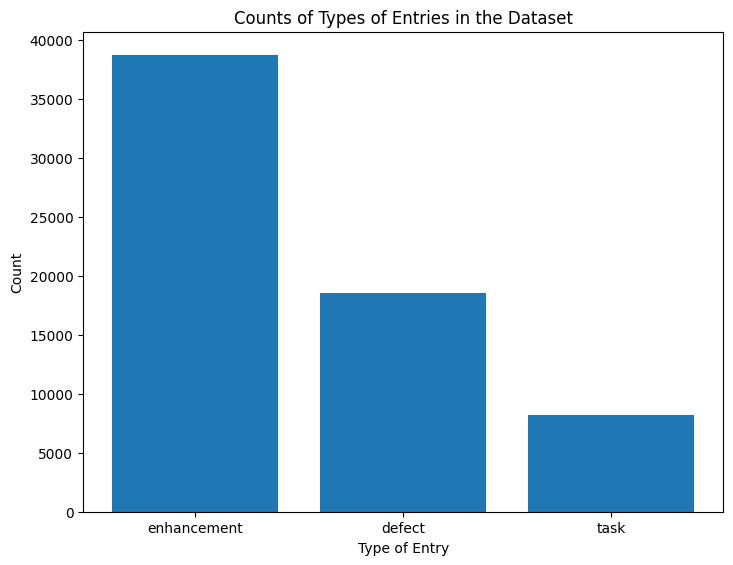

In [87]:
#Calculate the mean length of summaries found in the complete data.
summaries = pd.Series(complete_dataset['summary'])
summary_lengths = summaries.str.len()
mean_length = summary_lengths.mean()
print("Mean summary length across complete dataset: ", mean_length)

print("Number of entries with dependencies: ", complete_dataset['depends_on'].dropna().count())

entry_types = complete_dataset["type"].value_counts()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1], title =("Counts of Types of Entries in the Dataset"))
ax.bar(entry_types.index, entry_types.values)
plt.xlabel("Type of Entry")
plt.ylabel("Count")
plt.show()